In [ ]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.fcn_alexnet_model import FcnAlexnetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/fcn_alexnet_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

In [2]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("all_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (2312, 320, 480, 3)
Size of masks collection :  (2312, 320, 480)


In [3]:
sess = tf.Session()
model = FcnAlexnetModel(config)
logger = Logger(sess,config)
trainer = RoadTrainer(sess,model,data,config,logger)
trainer.train()

Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:25<00:00,  2.03s/it]


-->Last epoch loss     :  0.6890567
-->Last epoch accuracy :  0.19001238
-->Last test loss     :  0.685121
-->Last test accuracy :  0.20461346
Saving model...
Model saved
Epoch  1


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:24<00:00,  2.03s/it]


-->Last epoch loss     :  0.38155487
-->Last epoch accuracy :  0.30193374
-->Last test loss     :  0.25850394
-->Last test accuracy :  0.38616765
Saving model...
Model saved


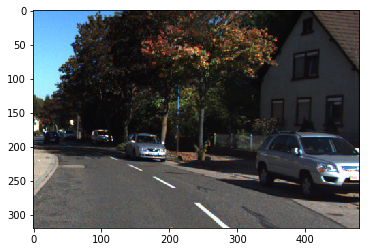

Accuracy :  0.5642404


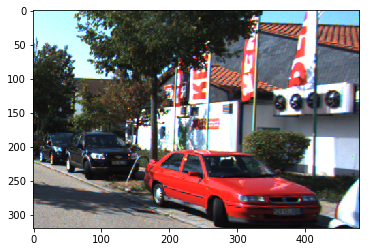

Accuracy :  0.31735432


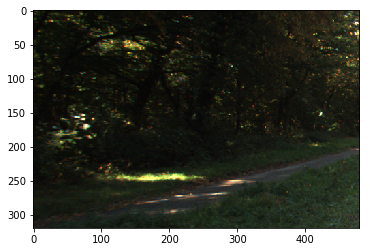

Accuracy :  3.4933033e-05


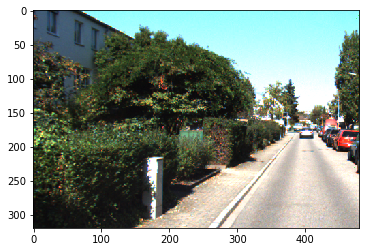

Accuracy :  0.32865423


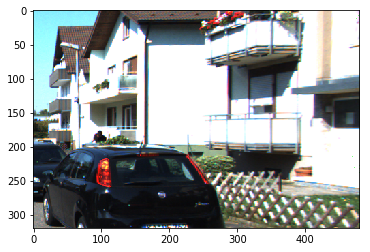

Accuracy :  0.02424859


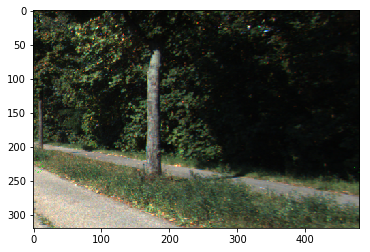

Accuracy :  4.272878e-05


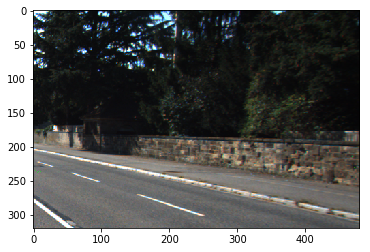

Accuracy :  0.5267215


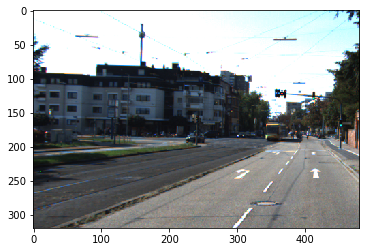

Accuracy :  0.48553428


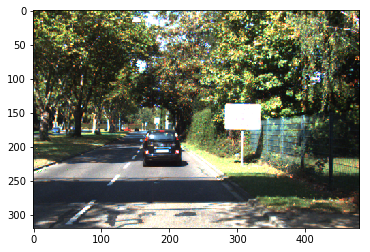

Accuracy :  0.49078977


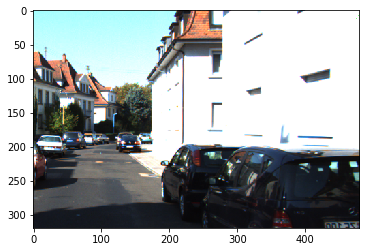

Accuracy :  0.3839745


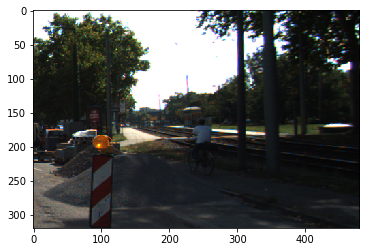

Accuracy :  0.2848558


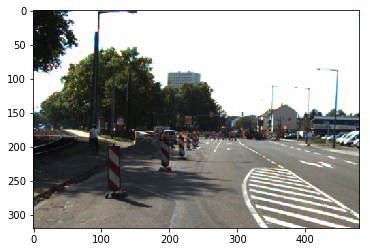

Accuracy :  0.53467566


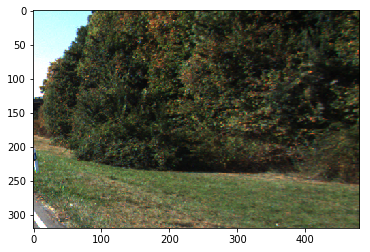

Accuracy :  0.046023324


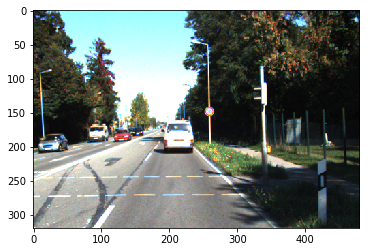

Accuracy :  0.47859174


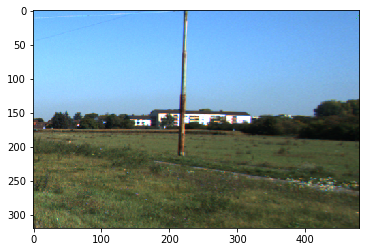

Accuracy :  3.801082e-05


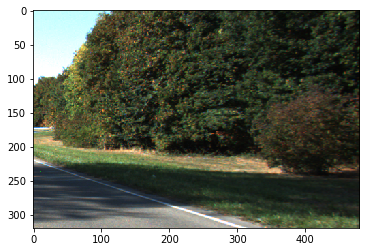

Accuracy :  0.40111274


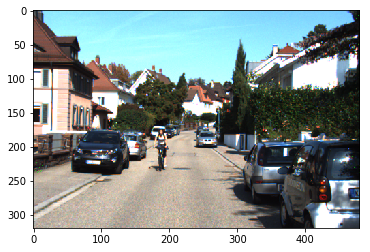

Accuracy :  0.4777132


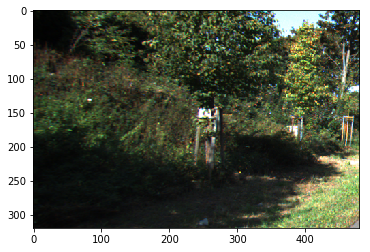

Accuracy :  0.0036585373


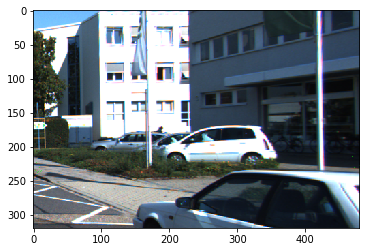

Accuracy :  0.22972924


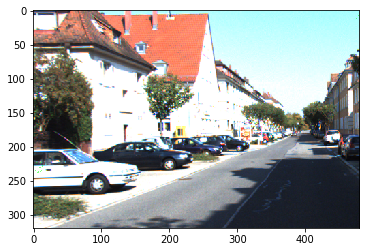

Accuracy :  0.5288871


In [4]:
test = [data.get_data_element("all_data",i) for i in range(20)]
for item in test :
    img = item[0]
    mask = item[1]
    model.predict(sess,img,mask)